<a href="https://colab.research.google.com/github/ISSQ1/Project/blob/main/KAUST_Stage_2_Ex1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Predict weekly sales of a walmart store using linear regression

You are provided with a dataset about Walmart's sales in a CSV file.

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week: 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Note:

You might find it helpful to include information about the kind of holiday week it is. This is something you'll need to add through data processing.
You can use this information about the holiday weeks.

Holiday Events:
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Tasks:
- Preprocess the data:
    - Remove any column which might not be useful
    - Add holiday type information
    - Normalize the data
- Split the data randomly into training and testing sets (80:20 split)
- Build and train a linear regression model. You can use any framerwork for this (numpy, sklearn or pytorch)
- Evaluate the trained model on test data. Report Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
- Visualize model performance using graphs.

In [118]:
from IPython.display import clear_output

In [119]:
%pip install gdown==4.5


clear_output()

In [120]:
# Download the CSV file.
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 24.5MB/s]


In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Load the data
data_df = pd.read_csv('Walmart.csv')

In [123]:
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#Tasks:
##Preprocess the data:
####Remove any column which might not be useful
####Add holiday type information
####Normalize the data

In [124]:
# Step 1: Remove columns not useful
data_df.drop(columns=["Store","CPI"], inplace=True)

In [125]:
data_df.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Unemployment
0,05-02-2010,1643690.90,0,42.31,2.572,8.106
1,12-02-2010,1641957.44,1,38.51,2.548,8.106
2,19-02-2010,1611968.17,0,39.93,2.514,8.106
3,26-02-2010,1409727.59,0,46.63,2.561,8.106
4,05-03-2010,1554806.68,0,46.50,2.625,8.106


In [126]:
# Step 2: Add holiday type information
def get_holiday_type(date):
    # List of holiday events
    holidays = {
        "Super_Bowl": ["2010-02-12", "2011-02-11", "2012-02-10", "2013-02-08"],
        "Labour_Day": ["2010-09-10", "2011-09-09", "2012-09-07", "2013-09-06"],
        "Thanksgiving": ["2010-11-26", "2011-11-25", "2012-11-23", "2013-11-29"],
        "Christmas": ["2010-12-31", "2011-12-30", "2012-12-28", "2013-12-27"]
    }
    date_str = date.strftime("%Y-%m-%d")
    for holiday, dates in holidays.items():
        if date_str in dates:
            return holiday
    return "Non-holiday"

data_df["Date"] = pd.to_datetime(data_df["Date"])
data_df["Holiday_Type"] = data_df["Date"].apply(get_holiday_type)

<ipython-input-126-6a951e253ea4>:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_df["Date"] = pd.to_datetime(data_df["Date"])


In [127]:
data_df

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Unemployment,Holiday_Type
0,2010-05-02,1643690.90,0,42.31,2.572,8.106,Non-holiday
1,2010-12-02,1641957.44,1,38.51,2.548,8.106,Non-holiday
2,2010-02-19,1611968.17,0,39.93,2.514,8.106,Non-holiday
3,2010-02-26,1409727.59,0,46.63,2.561,8.106,Non-holiday
4,2010-05-03,1554806.68,0,46.50,2.625,8.106,Non-holiday
...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,8.684,Non-holiday
6431,2012-05-10,733455.07,0,64.89,3.985,8.667,Non-holiday
6432,2012-12-10,734464.36,0,54.47,4.000,8.667,Non-holiday
6433,2012-10-19,718125.53,0,56.47,3.969,8.667,Non-holiday


In [128]:
#Step 3: Normalize the data (excluding "Date" and "Holiday_Type" columns)
normalized_data = (data_df.drop(columns=["Date", "Holiday_Type"]) - data_df.drop(columns=["Date", "Holiday_Type"]).mean()) / data_df.drop(columns=["Date", "Holiday_Type"]).std()

# Combine normalized data with "Date" and "Holiday_Type" columns
normalized_data = pd.concat([data_df[["Date", "Holiday_Type"]], normalized_data], axis=1)

print(normalized_data.head())

        Date Holiday_Type  Weekly_Sales  Holiday_Flag  Temperature  \
0 2010-05-02  Non-holiday      1.057338     -0.274183    -0.995058   
1 2010-12-02  Non-holiday      1.054266      3.646633    -1.201077   
2 2010-02-19  Non-holiday      1.001128     -0.274183    -1.124091   
3 2010-02-26  Non-holiday      0.642778     -0.274183    -0.760848   
4 2010-05-03  Non-holiday      0.899844     -0.274183    -0.767896   

   Fuel_Price  Unemployment  
0   -1.713667      0.056959  
1   -1.765952      0.056959  
2   -1.840023      0.056959  
3   -1.737631      0.056959  
4   -1.598203      0.056959  


#Split the data randomly into training and testing sets (80:20 split)

In [129]:
data_df = data_df.drop(columns=['Date']) # because when we train our model linear regression expects numerical data.

In [130]:
# Splitting the data into features (X) and target (y)
X = data_df.drop(columns=['Weekly_Sales','Holiday_Type'])  # Features
y = data_df['Weekly_Sales']  # Target

# Splitting the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Training set - Features shape:", X_train.shape)
print("Training set - Target shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape)
print("Testing set - Target shape:", y_test.shape)

Training set - Features shape: (5148, 4)
Training set - Target shape: (5148,)
Testing set - Features shape: (1287, 4)
Testing set - Target shape: (1287,)


#Build and train a linear regression model by using sklearn framerwork

In [131]:
print("x",X_train.dtypes)
print("----------")
print("y",y_train.dtypes)

x Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
Unemployment    float64
dtype: object
----------
y float64


In [132]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

#Evaluate the trained model on test data. Report Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [141]:
# Predict the target values for the testing data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=True)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 476972.52594420314
Root Mean Squared Error (RMSE): 319038380565.964


#Visualize model performance using graphs.

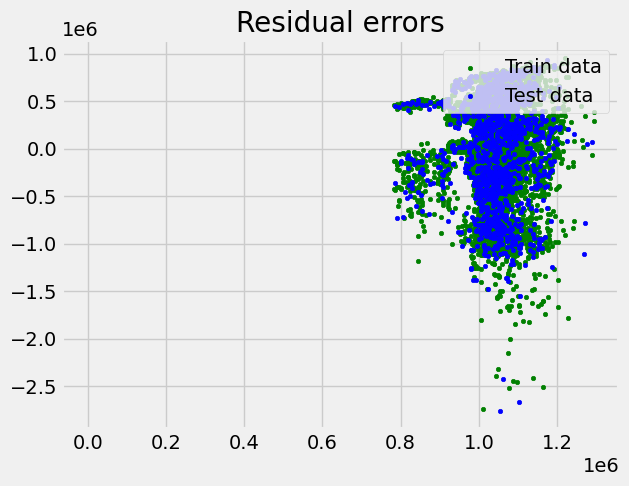

In [134]:
# plot for residual error

plt.style.use('fivethirtyeight')

plt.scatter(model.predict(X_train),
			model.predict(X_train) - y_train,
			color="green", s=10,
			label='Train data')

plt.scatter(model.predict(X_test),
			model.predict(X_test) - y_test,
			color="blue", s=10,
			label='Test data')

plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

plt.legend(loc='upper right')

plt.title("Residual errors")

plt.show()


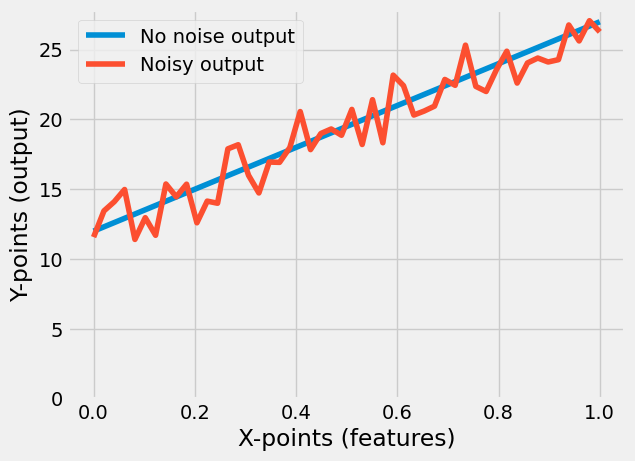

In [135]:
w0 = 12
w1 = 15
noise_scale_factor = 5
num_points = 50
x_points = np.linspace(0, 1, num_points)
y_points_no_noise = w0 + w1*x_points
noise = noise_scale_factor * (np.random.rand(*y_points_no_noise.shape)-0.5)

y_points = y_points_no_noise + noise

plt.plot(x_points, y_points_no_noise, label='No noise output')
plt.plot(x_points, y_points, label='Noisy output')
_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top)

plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output)')

plt.legend()
plt.show()

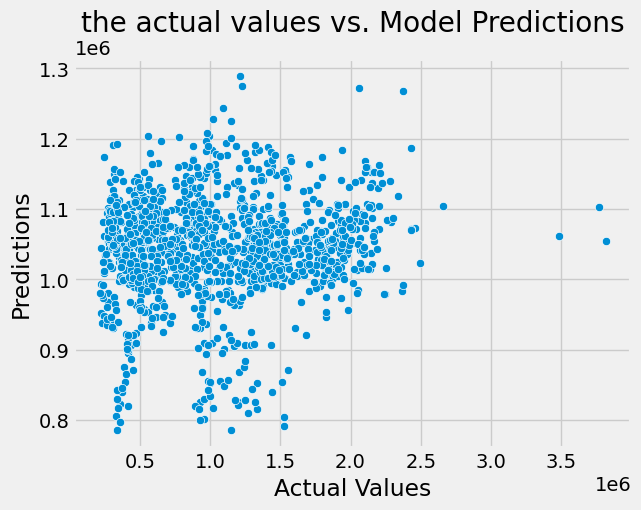

In [138]:
# convert y_test and predictions to DataFrame
df = pd.DataFrame({'Actual Values': y_test, 'Predictions': y_pred})

# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x='Actual Values', y='Predictions', data=df)
plt.xlabel("Actual Values")
plt.ylabel('Predictions')
plt.title('the actual values vs. Model Predictions')
plt.show()

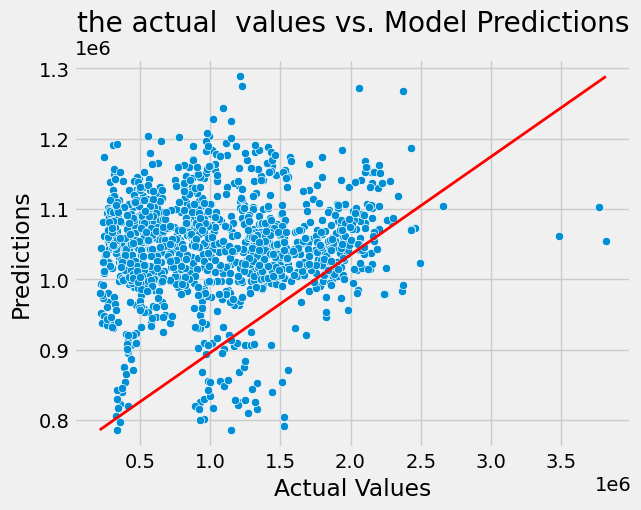

In [139]:
# Draw the regression line
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x='Actual Values', y='Predictions', data=df)
plt.xlabel("Actual Values")
plt.ylabel('Predictions')
plt.title('the actual  values vs. Model Predictions')
plt.plot([min(df['Actual Values']), max(df['Actual Values'])], [min(df['Predictions']), max(df['Predictions'])], color='red', linewidth=2)
plt.show()

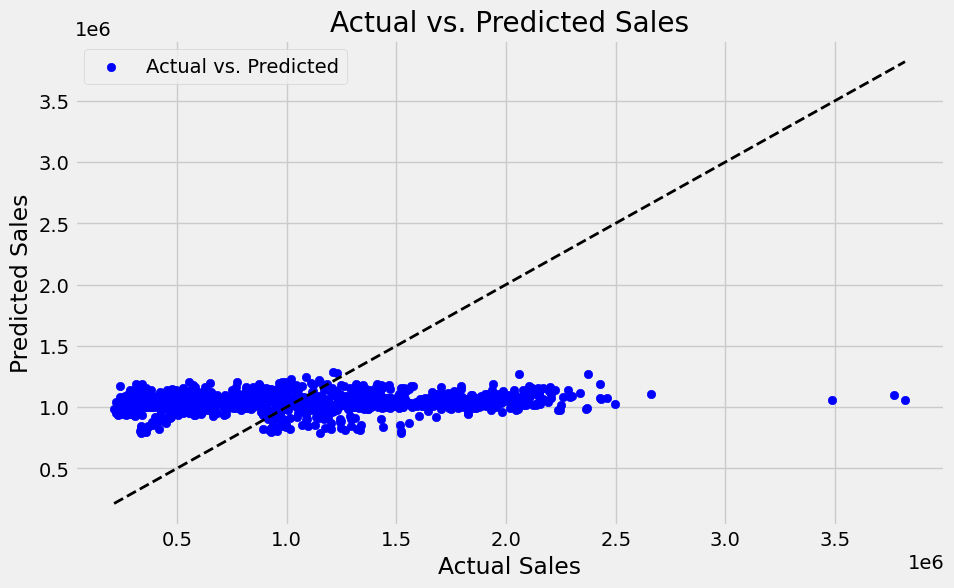

In [140]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()
